# 신경망에서 필요한 함수 정의
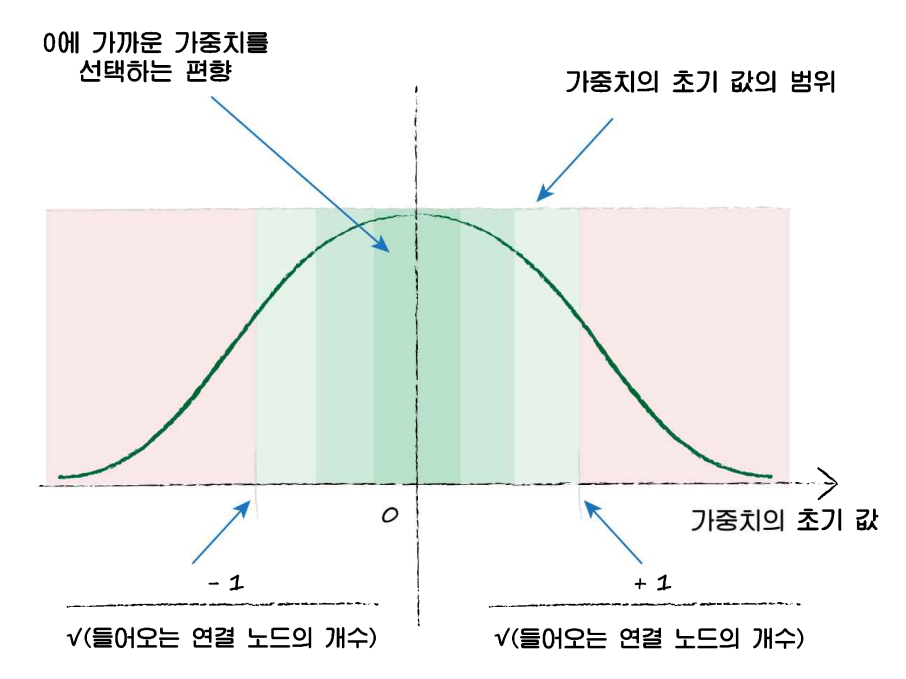

In [1]:
import random
# 가중치 행렬 초기화 함수
def initialize_weights(inputnodes, outputnodes):
  # weights 행렬의 크기는 (outputnodes, inputnodes)
  # 1/√(들어오는 연결 노드의 개수) : pow(outputnodes, -0.5)
  # random.gauss(0.0, pow(outputnodes, -0.5)) : 평균이 0 이고 표준 편차가 1/√(들어오는 연결 노드의 개수) 인 정규 분포를 따르는 랜덤 실수 생성
  weights = []
  for _ in range(outputnodes):
    temp = []
    for _ in range(inputnodes):
      temp.append(random.gauss(0.0, pow(outputnodes, -0.5)))
    weights.append(temp)
  return weights

# 활성화 함수
# 행렬의 각 요소에 시그모이드 함수 적용
def activation_function(a):
  # 행렬 a의 크기 확인
  rows, cols = len(a), len(a[0])
  # 결과 행렬 초기화
  result = []
  for _ in range(rows):
    temp = []
    for _ in range(cols):
      temp.append(0)
    result.append(temp)
  # 시그모이드 함수 계산
  for i in range(rows):
    for j in range(cols):
      result[i][j] = sigmoid(a[i][j])
  return result

# 시그모이드 함수
def sigmoid(x):
  e = 2.71828
  return 1 / (1 + (e **(-x)))

# 행렬 계산 함수 정의

In [2]:
# 1차원 리스트를 2차원 행렬로 변환
def convert_to_matrix(a):
  # 리스트 a의 크기 확인
  rows = len(a)
  # 결과 행렬 초기화
  result = []
  # 결과 행렬에 삽입
  for item in a:
    result.append([item])
  return result

# 행렬+행렬 계산 함수
def matrix_add(a, b):
  # 행렬 a와 b의 크기 확인
  # 행렬 a와 b의 크기는 같다
  rows, cols = len(a), len(a[0])
  # 결과 행렬 초기화
  result = []
  for _ in range(rows):
    temp = []
    for _ in range(cols):
      temp.append(0)
    result.append(temp)
  # 계산
  for i in range(rows):
    for j in range(cols):
        result[i][j] = a[i][j] + b[i][j]
  return result

# 행렬-행렬 계산 함수
def matrix_sub(a, b):
  # 행렬 a와 b의 크기 확인
  # 행렬 a와 b의 크기는 같다
  rows, cols = len(a), len(a[0])
  # 결과 행렬 초기화
  result = []
  for _ in range(rows):
    temp = []
    for _ in range(cols):
      temp.append(0)
    result.append(temp)
  # 계산
  for i in range(rows):
    for j in range(cols):
        result[i][j] = a[i][j] - b[i][j]
  return result

# 행렬*행렬 계산 함수
def matrix_mul(a, b):
  # 행렬 a와 b의 크기 확인
  # 행렬 a와 b의 크기는 같다
  rows, cols = len(a), len(a[0])
  # 결과 행렬 초기화
  result = []
  for _ in range(rows):
    temp = []
    for _ in range(cols):
      temp.append(0)
    result.append(temp)
  # 계산
  for i in range(rows):
    for j in range(cols):
        result[i][j] = a[i][j] * b[i][j]
  return result

# 행렬곱 계산 함수
def matrix_dot(a, b):
  # 행렬 a와 b의 크기 확인
  # cols_a 와 rows_b 는 같다
  rows_a, cols_a = len(a), len(a[0])
  rows_b, cols_b = len(b), len(b[0])
  # 결과 행렬 초기화
  result = []
  for _ in range(rows_a):
    temp = []
    for _ in range(cols_b):
      temp.append(0)
    result.append(temp)
  # 계산
  for i in range(rows_a):
    for j in range(cols_b):
      for k in range(cols_a):
        result[i][j] += a[i][k] * b[k][j]
  return result

# 스칼라-행렬 계산 함수
def scalar_matrix_sub(s, a):
    # 행렬 a의 크기 확인
    rows, cols = len(a), len(a[0])
    # 결과 행렬 초기화
    result = []
    for _ in range(rows):
      temp = []
      for _ in range(cols):
        temp.append(0)
      result.append(temp)
    # 계산
    for i in range(rows):
      for j in range(cols):
        result[i][j] = s - a[i][j]
    return result

# 스칼라*행렬 계산 함수
def scalar_matrix_mul(s, a):
    # 행렬 a의 크기 확인
    rows, cols = len(a), len(a[0])
    # 결과 행렬 초기화
    result = []
    for _ in range(rows):
      temp = []
      for _ in range(cols):
        temp.append(0)
      result.append(temp)
    # 계산
    for i in range(rows):
      for j in range(cols):
        result[i][j] = s * a[i][j]
    return result

# 행렬 전치 함수
def matrix_transpose(a):
  # 행렬 a의 크기 확인
  rows, cols = len(a), len(a[0])
  # 결과 행렬 초기화
  result = []
  # 결과 행렬에 삽입
  for i in range(cols):
    temp = []
    for j in range(rows):
      temp.append(a[j][i])
    result.append(temp)
  return result

# 신경망 클래스 정의
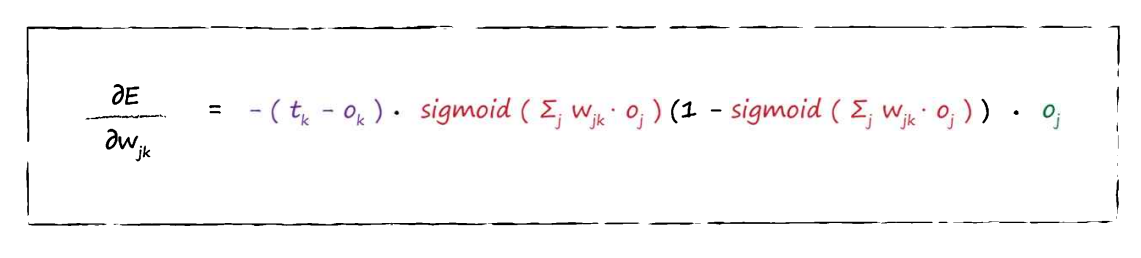
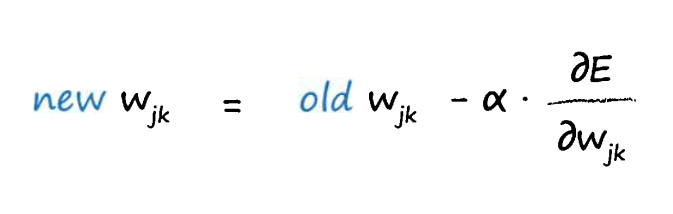

In [3]:
# 신경망 클래스 정의
class neuralNetwork:
    # 신경망 초기화
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 입력, 은닉, 출력 계층의 노드 개수 설정
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        # 가중치 행렬 초기화
        self.wih = initialize_weights(self.inodes, self.hnodes)
        self.who = initialize_weights(self.hnodes, self.onodes)
        #학습률
        self.lr = learningrate
    # 신경망 학습
    def train(self, inputs_list, targets_list):
        # 입력 리스트, target 리스트를 2차원의 행렬로 변환
        inputs = convert_to_matrix(inputs_list)
        targets = convert_to_matrix(targets_list)
        # 은닉 계층으로 들어오는 신호 계산
        hidden_inputs = matrix_dot(self.wih, inputs)
        # 은닉 계층에서 나가는 신호 계산
        hidden_outputs = activation_function(hidden_inputs)
        # 출력 계층으로 들어오는 신호 계산
        final_inputs = matrix_dot(self.who, hidden_outputs)
        # 출력 계층에서 나가는 신호 계산
        final_outputs = activation_function(final_inputs)
        # 출력 계층의 오차 계산
        output_errors = matrix_sub(targets, final_outputs)
        # 은닉 계층의 오차 계산
        hidden_errors = matrix_dot(matrix_transpose(self.who), output_errors)
        # 은닉 계층과 출력 계층 간의 가중치 행렬 업데이트
        self.who = matrix_add(self.who, scalar_matrix_mul(self.lr, matrix_dot((matrix_mul(matrix_mul(output_errors, final_outputs), scalar_matrix_sub(1, final_outputs))), matrix_transpose(hidden_outputs))))
        # 입력 계층과 출력 계층 간의 가중치 행렬 업데이트
        self.wih = matrix_add(self.wih, scalar_matrix_mul(self.lr, matrix_dot((matrix_mul(matrix_mul(hidden_errors, hidden_outputs), scalar_matrix_sub(1, hidden_outputs))), matrix_transpose(inputs))))
    # 신경망에서 결과 얻기
    def query(self, inputs_list):
        # 입력 리스트를 2차원 행렬로 변환
        inputs = convert_to_matrix(inputs_list)
        # 은닉 계층으로 들어오는 신호 계산
        hidden_inputs = matrix_dot(self.wih, inputs)
        # 은닉 계층에서 나가는 신호 계산
        hidden_outputs = activation_function(hidden_inputs)
        # 출력 계층으로 들어오는 신호 계산
        final_inputs = matrix_dot(self.who, hidden_outputs)
        # 출력 계층에서 나가는 신호 계산
        final_outputs = activation_function(final_inputs)
        return final_outputs

# (MNIST) 신경망 선언

In [4]:
#입력, 은닉, 출력 노드의 수
input_nodes = 28*28
hidden_nodes = 200
output_nodes = 10

#학습률
learning_rate = 0.1

nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# (MNIST) 학습 데이터 로드

In [5]:
train_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
train_data_list = train_data_file.readlines()
train_data_file.close()

# (MNIST) 학습 데이터 확인

In [6]:
# train_data는 csv에서 가져왔으므로, ','와 '\n'이 포함된 문자열이니 split을 이용해서 숫자만 있는 list로 변환
train_data = train_data_list[0].split(',')
# train_data의 크기는 785
# 0번 인덱스는 라벨이 되고, 그 뒤 784개의 요소는 28*28 이미지가 일차원으로 들어있다.
label = train_data[0]
image = train_data[1:]
# 들어있는 데이터 확인
print(label)
for i in range(28):
  for j in range(28):
    print(image[i*28 + j], end="\t")
  print()

5
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0

# (MNIST) 신경망 학습시키기

In [7]:
# colab 환경에서 약 2분 소요
epochs = 1

for epoch in range(epochs):
    print(epoch+1, '/', epochs)
    for i in range(len(train_data_list)):
        train_data = train_data_list[i].split(',')
        # targets 만들기
        label = train_data[0]
        targets = []
        for i in range(10):
          if i == int(label): targets.append(0.99)
          else: targets.append(0.01)
        # inputs 만들기
        image = train_data[1:]
        inputs = []
        for i in range(28*28):
          inputs.append((float(image[i]) / 255.0 * 0.99) + 0.01)
        # train 수행
        nn.train(inputs, targets)

1 / 1


# (MNIST) 테스트 데이터 로드

In [8]:
test_data_file = open("mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# (MNIST) 신경망 테스트

In [9]:
correct = 0
total = 0

for test_data in test_data_list:
    test_data = test_data.split(',')
    # target 만들기
    target = test_data[0]
    # inputs 만들기
    image = test_data[1:]
    inputs = []
    for i in range(28*28):
      inputs.append((float(image[i]) / 255.0 * 0.99) + 0.01)
    # query 수행
    outputs = nn.query(inputs)
    # 정답 확인
    label = 0
    for i in range(10):
      if outputs[i] > outputs[label]: label = i
    print(label, int(target))
    if label == int(target):
      correct += 1
    total += 1

7 7
2 2
1 1
0 0
4 4
1 1
4 4
3 9
4 5
7 9


# (MNIST) 테스트 결과 확인

In [10]:
print ("correct / total :", correct, "/", total)

correct / total : 7 / 10


# (손글씨) 신경망 선언

In [11]:
#입력, 은닉, 출력 노드의 수
input_nodes = 16*16
hidden_nodes = 200
output_nodes = 7  # 20 21 22 23 24 25 26

#학습률
learning_rate = 0.1

nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# (손글씨) 학습 데이터 로드

In [12]:
train_data_file = open("dataset/train.csv", 'r')
train_data_list = train_data_file.readlines()
train_data_file.close()

# (손글씨) 학습 데이터 확인

In [13]:
# train_data는 csv에서 가져왔으므로, ','와 '\n'이 포함된 문자열이니 split을 이용해서 숫자만 있는 list로 변환
train_data = train_data_list[0].split(',')
# train_data의 크기는 60718
# 0번 인덱스는 라벨이 되고, 그 뒤 256개의 요소는 16*16 이미지가 일차원으로 들어있다.
label = train_data[0]
image = train_data[1:]
# 들어있는 데이터 확인
print(label)
for i in range(16):
  for j in range(16):
    print(image[i*16 + j], end="\t")
  print()

23
0	-1	-4	-6	-1	0	0	-1	-3	0	0	0	0	0	0	0	
-2	8	111	102	3	0	-1	1	12	-2	0	0	-2	-2	0	0	
-5	28	226	241	27	-3	-5	77	179	39	-4	-5	10	10	-2	0	
-2	8	185	256	75	-10	31	209	268	142	-15	64	190	167	15	-2	
-1	1	173	262	111	-10	109	256	263	187	55	203	272	187	8	-2	
-4	28	216	264	134	54	232	258	256	246	238	259	243	83	-7	0	
-4	23	203	264	158	156	264	259	255	256	259	251	110	3	-1	0	
0	-4	132	260	249	255	233	183	251	256	259	172	2	-2	0	0	
-1	1	165	261	256	259	157	37	232	259	259	111	-6	0	0	0	
-1	2	175	261	260	220	29	21	232	261	231	54	-4	0	0	0	
-1	2	174	262	262	150	-9	14	220	265	156	0	-1	0	0	0	
-1	1	173	263	250	77	-9	14	222	260	93	-7	0	0	0	0	
-2	8	184	265	187	17	-4	8	197	239	53	-5	0	0	0	0	
-5	28	224	266	102	-7	-1	-1	61	74	3	-1	0	0	0	0	
-2	8	110	134	19	-2	0	0	-5	-6	-1	0	0	0	0	0	
0	-1	-5	-5	-2	0	0	0	0	0	0	0	0	0	0	0
	


# (손글씨) 신경망 학습시키기

In [15]:
# 짧은 학습 시간을 위해 60718 개의 학습 데이터 중 10000 개만 사용
# colab 환경에서 약 20분 소요
# for i in range 부분의 반복횟수를 1000 정도로 줄여도 어느정도 학습 된다
epochs = 1

for epoch in range(epochs):
    print(epoch+1, '/', epochs)
    for i in range(10000):
        print(i, end=" ")
        train_data = train_data_list[i].split(',')
        # targets 만들기
        label = train_data[0]
        targets = []
        for i in range(7):  # 20 21 22 23 24 25 26 -> 0 1 2 3 4 5 6
          if i == int(label)-20: targets.append(0.99)
          else: targets.append(0.01)
        # inputs 만들기
        image = train_data[1:]
        inputs = []
        for i in range(16*16):
          inputs.append((float(image[i]) / 255.0 * 0.99) + 0.01)
        # train 수행
        nn.train(inputs, targets)

1 / 1
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 

# (손글씨) 테스트 데이터 로드

In [16]:
test_data_file = open("dataset/test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# (손글씨) 신경망 테스트

In [17]:
correct = 0
total = 0

for test_data in test_data_list:
    test_data = test_data.split(',')
    # target 만들기
    target = test_data[0]
    # inputs 만들기
    image = test_data[1:]
    inputs = []
    for i in range(16*16):
      inputs.append((float(image[i]) / 255.0 * 0.99) + 0.01)
    # query 수행
    outputs = nn.query(inputs)
    # 정답 확인
    label = 0
    for i in range(7):
      if outputs[i] > outputs[label]: label = i
    print(label, int(target)-20)
    if label == int(target)-20:
      correct += 1
    total += 1

0 0
0 0
0 0
5 1
1 1
2 2
2 2
2 2
3 3
3 3
0 3
5 4
4 4
4 4
5 5
5 5
5 5
6 6
6 6
5 6


# (손글씨) 테스트 결과 확인

In [18]:
print ("correct / total :", correct, "/", total)

correct / total : 16 / 20
